In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pylab 
import statistics as stats
import scipy.stats as scipy
from pylab import rcParams
import os

In [4]:
os.getcwd()

'C:\\Users\\gothv\\Practice\\Thinkful- Assignments'

In [5]:
os.chdir('C:\\Users\\gothv\\OneDrive\\Desktop\\Data\\Datasets')

In [6]:
os.getcwd()

'C:\\Users\\gothv\\OneDrive\\Desktop\\Data\\Datasets'

## Checkpoint 3: Data Cleaning 2- Missing Variables

In [7]:
df= pd.read_csv('states_all.csv')

In [8]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [9]:
df.shape

(1492, 25)

In [10]:
df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.229000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.229000e+03,...,1361.000000,1361.000000,1361.00000,1.361000e+03,1.361000e+03,1.319000e+03,536.000000,532.000000,533.000000,498.000000
mean,2004.433646,9.159308e+05,9.092082e+06,7.663723e+05,4.216553e+06,4.109157e+06,9.196681e+06,4.762966e+06,2.680331e+06,4.292046e+05,...,64538.927259,64271.057311,54268.92432,5.192140e+05,2.470714e+05,8.024415e+05,234.768293,278.414711,218.866154,263.661132
std,7.393983,1.065280e+06,1.174519e+07,1.145242e+06,5.543072e+06,5.482971e+06,1.197813e+07,6.293004e+06,3.353349e+06,5.340693e+05,...,80293.387625,78910.545776,67889.27623,6.436384e+05,3.077056e+05,9.707031e+05,10.221511,10.159722,7.769616,6.803725
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,633.000000,437.000000,311.00000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,2.583140e+05,2.186305e+06,1.893540e+05,1.153097e+06,7.158345e+05,2.165404e+06,1.168032e+06,6.357900e+05,1.028310e+05,...,13739.000000,13342.000000,10919.00000,1.106260e+05,5.147100e+04,1.810650e+05,229.694352,272.761598,214.663401,259.533171
50%,2004.000000,6.483130e+05,5.079546e+06,4.033765e+05,2.537074e+06,2.055780e+06,5.234506e+06,2.657452e+06,1.525406e+06,2.715960e+05,...,43272.000000,43339.000000,36735.00000,3.457750e+05,1.642600e+05,5.503420e+05,237.238552,280.618803,220.416034,265.010912
75%,2011.000000,1.014528e+06,1.085985e+07,8.289660e+05,5.080939e+06,4.768680e+06,1.074519e+07,5.568028e+06,3.229651e+06,5.186000e+05,...,75481.000000,76566.000000,67460.00000,6.119050e+05,2.905020e+05,9.282755e+05,241.995486,285.347428,223.999337,268.190121
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.00000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


**Task 1:** Determine all variable types and find the fraction of the missing values for each variable.

In [11]:
df.dtypes

PRIMARY_KEY                      object
STATE                            object
YEAR                              int64
ENROLL                          float64
TOTAL_REVENUE                   float64
FEDERAL_REVENUE                 float64
STATE_REVENUE                   float64
LOCAL_REVENUE                   float64
TOTAL_EXPENDITURE               float64
INSTRUCTION_EXPENDITURE         float64
SUPPORT_SERVICES_EXPENDITURE    float64
OTHER_EXPENDITURE               float64
CAPITAL_OUTLAY_EXPENDITURE      float64
GRADES_PK_G                     float64
GRADES_KG_G                     float64
GRADES_4_G                      float64
GRADES_8_G                      float64
GRADES_12_G                     float64
GRADES_1_8_G                    float64
GRADES_9_12_G                   float64
GRADES_ALL_G                    float64
AVG_MATH_4_SCORE                float64
AVG_MATH_8_SCORE                float64
AVG_READING_4_SCORE             float64
AVG_READING_8_SCORE             float64


In [12]:
round(df.isnull().sum()/df.isnull().count())*100

PRIMARY_KEY                       0.0
STATE                             0.0
YEAR                              0.0
ENROLL                            0.0
TOTAL_REVENUE                     0.0
FEDERAL_REVENUE                   0.0
STATE_REVENUE                     0.0
LOCAL_REVENUE                     0.0
TOTAL_EXPENDITURE                 0.0
INSTRUCTION_EXPENDITURE           0.0
SUPPORT_SERVICES_EXPENDITURE      0.0
OTHER_EXPENDITURE                 0.0
CAPITAL_OUTLAY_EXPENDITURE        0.0
GRADES_PK_G                       0.0
GRADES_KG_G                       0.0
GRADES_4_G                        0.0
GRADES_8_G                        0.0
GRADES_12_G                       0.0
GRADES_1_8_G                      0.0
GRADES_9_12_G                     0.0
GRADES_ALL_G                      0.0
AVG_MATH_4_SCORE                100.0
AVG_MATH_8_SCORE                100.0
AVG_READING_4_SCORE             100.0
AVG_READING_8_SCORE             100.0
dtype: float64

**Task 2:** Ignoring the time, choose a method for dealing with the missing variables. Which variables would it make sense to fill with another value? Which variables would it make sense to "throw out"?

Since this task does not require us to pay attention to the year I decided to replace all missing values with the mean of the column it is in. (I had to  borrow help from the solutions on this one!)

In [13]:
# Make a new df to play with and not alter the original.
df2 = df.copy()

#List of all of the continuous variables in the data frame to make editing later easier!
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", 
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", 
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", 
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", 
             "GRADES_9_12_G", "GRADES_ALL_G", 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']

for col in fill_list:
    df2.loc[:, col].fillna(df2.loc[:, col].mean(), inplace=True)
df2.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,915930.820993,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,263.661132
1,1992_ALASKA,ALASKA,1992,915930.820993,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,234.768293,278.414711,218.866154,258.859712
2,1992_ARIZONA,ARIZONA,1992,915930.820993,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,915930.820993,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,915930.820993,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,263.661132


**Task 3:** Paying attention to time frames, replicate your answer to question 2, but with some statistic that is relevant to the year.

In [14]:
df3 = df.copy()
# Creating a variable to identify the unique years in the df
years = df3["YEAR"].unique()

# For every instance of a column listed in the fill_list:
for col in fill_list:
    for year in years: # In df3 locate every instance where "YEAR" is equal to the year in years, a unique value, and fill in the null values with the mean
        #of the info from that year -- not sure what the col is-- maybe by column?
        df3.loc[df3["YEAR"] == year, col].fillna(
        df3[df3["YEAR"] == year][col].mean(), inplace=True)
df3.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


**Task 4:** Fill in the missing values using interpolation (extrapolation).

In [15]:
df4= df.copy()
# For columns in the fill_list look at df4 where they match and interpolate the values
for col in fill_list:
   df4.loc[:, col].interpolate(inplace=True)
df4.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,211.790904,258.776900,207.088116,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,265.519676


**Task 5:** Compare your results from your 2nd, 3rd, and 4th task. Did you find any meaningful differences?

After looking at this information (with help from the sample solution) I noticed some interesting differences. In all columns where the data was interpolated the numbers tend to look way different from the other data frames. 

In [16]:
for col in fill_list:
    # This gives a unique label for each sub chart based on the column name
    print("Statistics for columns: {}".format(col))
    print(pd.concat([df[col], df2[col],
                     df3[col], df4[col]], axis=1).describe())

Statistics for columns: ENROLL
             ENROLL        ENROLL        ENROLL        ENROLL
count  1.229000e+03  1.492000e+03  1.229000e+03  1.441000e+03
mean   9.159308e+05  9.159308e+05  9.159308e+05  7.950835e+05
std    1.065280e+06  9.667725e+05  1.065280e+06  1.025901e+06
min    4.386600e+04  4.386600e+04  4.386600e+04  4.386600e+04
25%    2.583140e+05  3.150940e+05  2.583140e+05  1.306530e+05
50%    6.483130e+05  8.204140e+05  6.483130e+05  4.965130e+05
75%    1.014528e+06  9.211780e+05  1.014528e+06  9.427380e+05
max    6.307022e+06  6.307022e+06  6.307022e+06  6.307022e+06
Statistics for columns: TOTAL_REVENUE
       TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE
count   1.280000e+03   1.492000e+03   1.280000e+03   1.492000e+03
mean    9.092082e+06   9.092082e+06   9.092082e+06   8.090707e+06
std     1.174519e+07   1.087818e+07   1.174519e+07   1.115317e+07
min     4.656500e+05   4.656500e+05   4.656500e+05   4.656500e+05
25%     2.186305e+06   2.546261e+06   2.186

        GRADES_12_G    GRADES_12_G   GRADES_12_G    GRADES_12_G
count    1361.00000    1492.000000    1361.00000    1492.000000
mean    54268.92432   54268.924320   54268.92432   49728.375335
std     67889.27623   64838.328605   67889.27623   66477.607416
min       311.00000     311.000000     311.00000     311.000000
25%     10919.00000   13437.000000   10919.00000    8661.750000
50%     36735.00000   39566.000000   36735.00000   32926.000000
75%     67460.00000   64616.250000   67460.00000   64616.250000
max    498403.00000  498403.000000  498403.00000  498403.000000
Statistics for columns: GRADES_1_8_G
       GRADES_1_8_G  GRADES_1_8_G  GRADES_1_8_G  GRADES_1_8_G
count  1.361000e+03  1.492000e+03  1.361000e+03  1.492000e+03
mean   5.192140e+05  5.192140e+05  5.192140e+05  4.759529e+05
std    6.436384e+05  6.147133e+05  6.436384e+05  6.304364e+05
min    4.878000e+03  4.878000e+03  4.878000e+03  4.878000e+03
25%    1.106260e+05  1.211522e+05  1.106260e+05  7.884750e+04
50%    3.457750

## Check Point 4: Data Cleaning 3: Outliers

1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?


2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.


3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.


4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.


5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?


6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

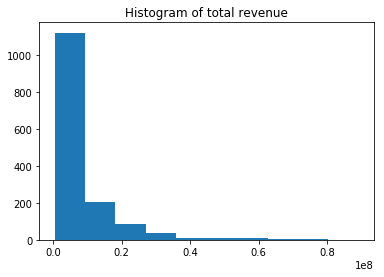

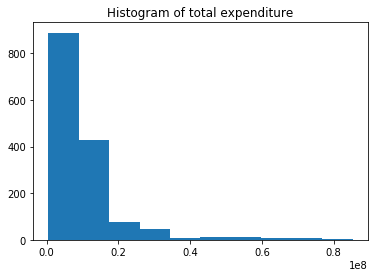

In [17]:
# Question 1: Do TOTAL_REVENUE and TOTAL_Expenditure have outliers?
#Step 1: visually identify any outliers
plt.hist(df2['TOTAL_REVENUE'])
plt.title("Histogram of total revenue")
plt.show();

plt.hist(df2['TOTAL_EXPENDITURE'])
plt.title("Histogram of total expenditure")
plt.show();
#Using this method it looks like we have potential outliers from 0.45 to 0.8 on the X-axis.

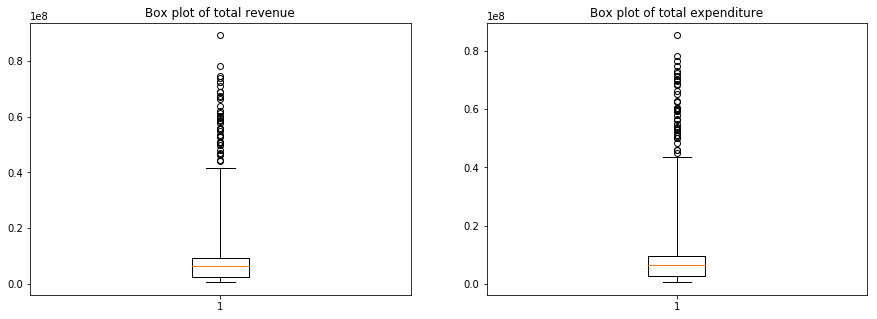

In [18]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(df2["TOTAL_REVENUE"], whis = 5)
plt.title("Box plot of total revenue")

plt.subplot(1,2,2)
plt.boxplot(df2["TOTAL_EXPENDITURE"], whis = 5)
plt.title("Box plot of total expenditure")
plt.show()

In [19]:
# Question 2: If you identify that there are outliers use the methods learned in this section to get rid of them.
from scipy.stats.mstats import winsorize

wins_rev = winsorize(df2['TOTAL_REVENUE'], (0, 0.05))

wins_exp = winsorize(df2['TOTAL_EXPENDITURE'], (0, 0.05))

Text(0.5, 1.0, 'Box plot of winsorized total expenditures')

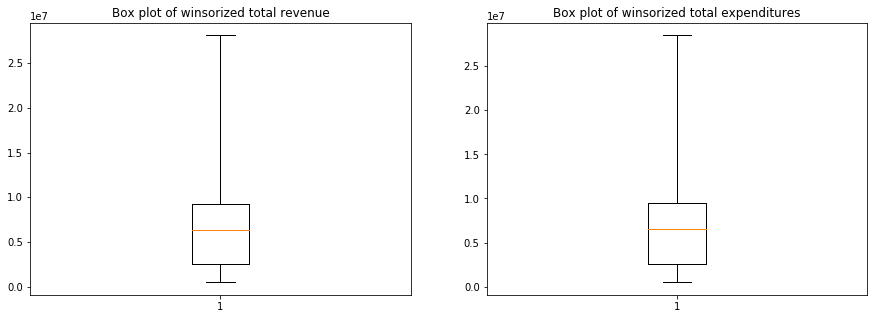

In [20]:
plt.figure(figsize= (15,5))

plt.subplot(1,2,1)
plt.boxplot(wins_rev, whis = 5)
plt.title("Box plot of winsorized total revenue");


plt.subplot(1,2,2)
plt.boxplot(wins_exp, whis = 5)
plt.title("Box plot of winsorized total expenditures")

Question 3: Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

In [21]:
budget_def= df2['TOTAL_REVENUE'] - df2['TOTAL_EXPENDITURE']

Text(0.5, 1.0, 'Box Plot of Budget Deficit')

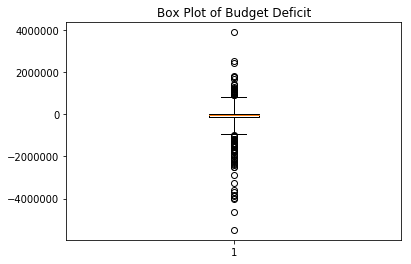

In [22]:
plt.boxplot(budget_def, whis = 5)
plt.title('Box Plot of Budget Deficit')

Both sides of this boxplot have outliers, so let's 2-way winsorize the data.

In [23]:
win_budget = winsorize(budget_def, [0.05, 0.05])


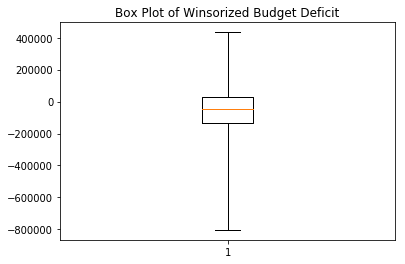

In [24]:
plt.boxplot(win_budget, whis = 5)
plt.title('Box Plot of Winsorized Budget Deficit');

Question 4: Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

In [25]:
budget_def2 = wins_rev -wins_exp

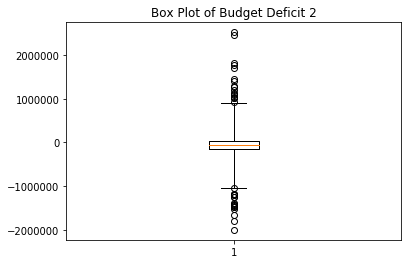

In [26]:
plt.boxplot(budget_def2, whis = 5)
plt.title('Box Plot of Budget Deficit 2');

In [27]:
# Since there are outliers on both sides I'm going to two-way winsorize the data.
win_budget2 = winsorize(budget_def2, (0.05, 0.05))

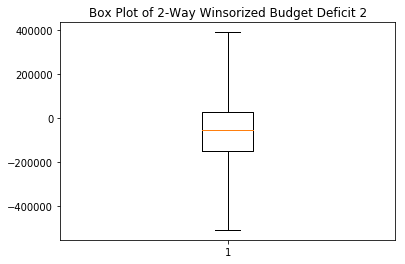

In [28]:
plt.boxplot(win_budget2, whis = 5)
plt.title('Box Plot of 2-Way Winsorized Budget Deficit 2');

Question 5: Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?


In [29]:
pd.DataFrame({"original_budget": budget_def, "winsorized_budget1": win_budget,
              "winsorized_budget2": win_budget2}).describe()

,original_budget,winsorized_budget1,winsorized_budget2
count,1.492000e+03,1492.000000,1492.000000
mean,-1.045990e+05,-78690.912301,-67544.236028
std,5.310770e+05,266231.659733,209792.574722
min,-5.487742e+06,-803208.000000,-509360.000000
25%,-1.360070e+05,-136007.000000,-152074.500000
50%,-4.849350e+04,-48493.500000,-54550.000000
75%,2.965425e+04,29654.250000,25195.750000
max,3.897129e+06,433970.000000,390332.000000


When comparing the "original budget" to the two winsorized budgets I see several differences. First, the mean of the original budget (-104,599.0) is larger than the mean for both winsorized budgets. The same is true for the standard deviation. The max and min for the original data set is different from the winsorized data, which makes sense since we 2-way winsorized both and got rid of outliers (though both are closer for the winsorized budget 2).

**Question 6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?**

I would prefer to use the method in question # 3 to deal with the outliers. The second method of dealing with the already winsorized data and winsorizing that has more opportunities to have data dropped and loose information.

## Check point 5: Data Exploration 1

1. Derive the descriptive statistics of the data and discuss the points you find remarkable.


2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.


3. In your chosen state, which of the lessons are the students more successful, math or reading?


4. What are the distributions of the math and reading scores in the sample?


5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

In [30]:
education_df= df2.copy()

In [31]:
education_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,...,1492.000000,1492.000000,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,1492.000000,1492.000000,1492.000000,1492.000000
mean,2004.433646,9.159308e+05,9.092082e+06,7.663723e+05,4.216553e+06,4.109157e+06,9.196681e+06,4.762966e+06,2.680331e+06,4.292046e+05,...,64538.927259,64271.057311,54268.924320,5.192140e+05,2.470714e+05,8.024415e+05,234.768293,278.414711,218.866154,263.661132
std,7.393983,9.667725e+05,1.087818e+07,1.060702e+06,5.133895e+06,5.078230e+06,1.109393e+07,5.828468e+06,3.105812e+06,4.846832e+05,...,76684.998585,75364.301721,64838.328605,6.147133e+05,2.938773e+05,9.126522e+05,6.122843,6.063038,4.641053,3.928132
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,633.000000,437.000000,311.000000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,3.150940e+05,2.546261e+06,2.170200e+05,1.356434e+06,9.447962e+05,2.523968e+06,1.343611e+06,7.673688e+05,1.354282e+05,...,15195.500000,15682.750000,13437.000000,1.211522e+05,5.919750e+04,2.293578e+05,234.768293,278.414711,218.866154,263.661132
50%,2004.000000,8.204140e+05,6.359310e+06,5.167410e+05,3.127639e+06,2.697257e+06,6.520224e+06,3.358142e+06,1.913844e+06,3.672335e+05,...,49884.500000,49571.000000,39566.000000,4.015865e+05,1.817010e+05,6.473260e+05,234.768293,278.414711,218.866154,263.661132
75%,2011.000000,9.211780e+05,9.276958e+06,7.663723e+05,4.269811e+06,4.109157e+06,9.434922e+06,4.938820e+06,2.795888e+06,4.568915e+05,...,71814.250000,72131.000000,64616.250000,5.749118e+05,2.825390e+05,8.724220e+05,234.768293,278.414711,218.866154,263.661132
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


**Question 2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.**

In [32]:
texas_ed = education_df.loc[education_df['STATE']== 'TEXAS']
texas_ed.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,26.000000,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,...,26.000000,26.000000,26.000000,2.600000e+01,2.600000e+01,2.600000e+01,26.000000,26.000000,26.000000,26.000000
mean,2004.500000,4.053921e+06,3.581071e+07,3.702552e+06,1.411665e+07,1.799150e+07,3.722592e+07,1.774354e+07,1.011587e+07,1.745364e+06,...,312381.263635,305099.004409,233120.455717,2.512807e+06,1.128030e+06,3.817593e+06,235.803751,279.278081,218.047582,264.175516
std,7.648529,1.033809e+06,1.396273e+07,2.110166e+06,5.000674e+06,7.142667e+06,1.469438e+07,6.619996e+06,3.833434e+06,7.118488e+05,...,81054.814482,78960.338460,69501.534191,6.512843e+05,3.069063e+05,1.014506e+06,5.139083,5.166242,1.674874,2.121173
min,1992.000000,9.159308e+05,9.092082e+06,7.663723e+05,4.216553e+06,4.109157e+06,9.196681e+06,4.762966e+06,2.680331e+06,4.292046e+05,...,64538.927259,64271.057311,54268.924320,5.192140e+05,2.470714e+05,8.024415e+05,217.918744,264.592828,212.394311,259.631360
25%,1998.250000,3.841790e+06,2.343999e+07,1.724350e+06,1.009781e+07,1.164836e+07,2.418425e+07,1.222986e+07,6.490166e+06,1.183127e+06,...,295046.750000,291161.500000,198038.250000,2.388074e+06,1.036572e+06,3.558528e+06,234.768293,278.414711,218.037396,263.661132
50%,2004.500000,4.234622e+06,3.559918e+07,3.571403e+06,1.310930e+07,1.858958e+07,3.774206e+07,1.815070e+07,1.038684e+07,1.764724e+06,...,321700.000000,320590.500000,241186.000000,2.597784e+06,1.189662e+06,3.976391e+06,234.768293,278.414711,218.866154,263.661132
75%,2010.750000,4.708412e+06,4.932279e+07,5.460844e+06,1.944233e+07,2.365195e+07,5.055987e+07,2.390081e+07,1.391557e+07,2.373582e+06,...,365025.750000,345780.000000,288424.500000,2.898772e+06,1.323806e+06,4.458040e+06,239.674948,280.430812,218.866154,263.661132
max,2017.000000,5.053291e+06,5.828416e+07,7.984614e+06,2.200430e+07,3.032651e+07,5.931488e+07,2.786220e+07,1.516901e+07,2.855527e+06,...,397085.000000,388428.000000,323708.000000,3.188705e+06,1.492452e+06,4.924653e+06,244.002472,290.346709,219.604313,270.700537


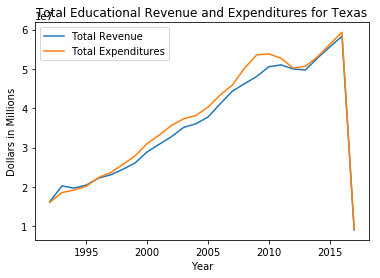

In [33]:
plt.plot(texas_ed['YEAR'], texas_ed['TOTAL_REVENUE'], label= 'Total Revenue')

plt.plot(texas_ed['YEAR'], texas_ed['TOTAL_EXPENDITURE'], label = 'Total Expenditures')

plt.title('Total Educational Revenue and Expenditures for Texas')
plt.xlabel('Year')
plt.ylabel('Dollars in Millions')
plt.legend();

In [34]:
texas_ed['TOTAL_EXPENDITURE']

43      1.611908e+07
94      1.857487e+07
145     1.922415e+07
196     2.019892e+07
247     2.240180e+07
298     2.367101e+07
349     2.572396e+07
400     2.788359e+07
451     3.106794e+07
502     3.320145e+07
553     3.566849e+07
604     3.733367e+07
655     3.815045e+07
706     4.030214e+07
757     4.339424e+07
808     4.592082e+07
860     5.020583e+07
914     5.357527e+07
966     5.381024e+07
1017    5.269183e+07
1068    5.021531e+07
1119    5.067472e+07
1170    5.309676e+07
1221    5.625579e+07
1272    5.931488e+07
1484    9.196681e+06
Name: TOTAL_EXPENDITURE, dtype: float64

NOTE: It seems that the values for both variables return to zero after 2017 based on the iteration of the data I am using. If this was something for a business I would go back, take a deep dive into the actual data itself, and see where the error was. I would then work on ways to correct/normalize it.

**Question 3. In your chosen state, which of the lessons are the students more successful, math or reading?**



In [35]:
avg_info =  ['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']

for col in avg_info:
    print('Info for {}:'.format(col))
    print('The average was: ' , round(texas_ed[col].mean()))
    print('The minimum value was: ', round(texas_ed[col].min()))
    print('The maximum value was: ', round(texas_ed[col].max()),'\n')



Info for AVG_MATH_4_SCORE:
The average was:  236
The minimum value was:  218.0
The maximum value was:  244.0 

Info for AVG_MATH_8_SCORE:
The average was:  279
The minimum value was:  265.0
The maximum value was:  290.0 

Info for AVG_READING_4_SCORE:
The average was:  218
The minimum value was:  212.0
The maximum value was:  220.0 

Info for AVG_READING_8_SCORE:
The average was:  264
The minimum value was:  260.0
The maximum value was:  271.0 



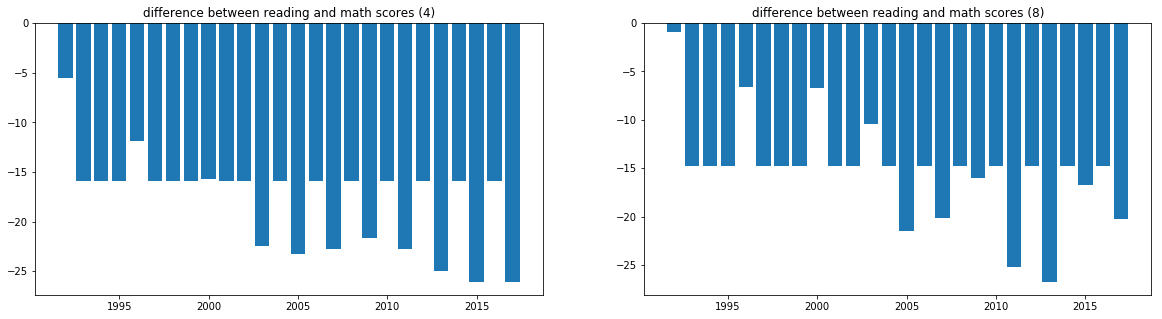

difference between reading and math scores (4)
43      -5.524433
94     -15.902139
145    -15.902139
196    -15.902139
247    -11.850907
298    -15.902139
349    -15.902139
400    -15.902139
451    -15.733788
502    -15.902139
553    -15.902139
604    -22.497916
655    -15.902139
706    -23.257092
757    -15.902139
808    -22.735447
860    -15.902139
914    -21.606351
966    -15.902139
1017   -22.780949
1068   -15.902139
1119   -25.016692
1170   -15.902139
1221   -26.059559
1272   -15.902139
1484   -26.065177
dtype: float64
difference between reading and math scores (8)
43      -0.931696
94     -14.753579
145    -14.753579
196    -14.753579
247     -6.607836
298    -14.753579
349    -14.753579
400    -14.753579
451     -6.755989
502    -14.753579
553    -14.753579
604    -10.486543
655    -14.753579
706    -21.471485
757    -14.753579
808    -20.160498
860    -14.753579
914    -15.984540
966    -14.753579
1017   -25.227153
1068   -14.753579
1119   -26.749917
1170   -14.753579
1221   -1

In [36]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.bar(education_df.loc[education_df.STATE == "TEXAS", "YEAR"],
         education_df.loc[education_df.STATE == "TEXAS", "AVG_READING_4_SCORE"] - education_df.loc[education_df.STATE == "TEXAS", "AVG_MATH_4_SCORE"])

plt.title("difference between reading and math scores (4)")

plt.subplot(1,2,2)
plt.bar(education_df.loc[education_df.STATE == "TEXAS", "YEAR"],
         education_df.loc[education_df.STATE == "TEXAS", "AVG_READING_8_SCORE"] - education_df.loc[education_df.STATE == "TEXAS", "AVG_MATH_8_SCORE"])

plt.title("difference between reading and math scores (8)")

plt.show()

print("difference between reading and math scores (4)")
print(education_df.loc[education_df.STATE == "TEXAS", "AVG_READING_4_SCORE"] - education_df.loc[education_df.STATE == "TEXAS", "AVG_MATH_4_SCORE"])
print("difference between reading and math scores (8)")
print(education_df.loc[education_df.STATE == "TEXAS", "AVG_READING_8_SCORE"] - education_df.loc[education_df.STATE == "TEXAS", "AVG_MATH_8_SCORE"])

I am not really sure what the above figure is actually trying to tell us. I borrowed it from the solution exercise, but neither me nor my mentor could interpert the visual.

Additionally: I am not sure how we are expected to compare two completely different subject matters for effectiveness when there is a myriad of information missing such as:
* Score scaling (What is the min. and max. possible score on each test?)
* Normalized data based on what test was administered/year (In Texas we have switched our standardized test at least three times in the above referenced time frame.)
* Some explaination of how test scores are normalized/compared across the nation (not all states take the same test- how can we compare them accurately?)
* Student tracking over time (How do we know that the 4th grade students who took the test are the same who took the 8th later?)

## Checkpoint 6: Data Exploration 2

In [37]:
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))


student_df = pd.read_sql_query('select * from studentsperformance',con=engine)

engine.dispose()

In [38]:
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [39]:
student_df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [40]:
student_df.describe(include= 'all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [41]:
student_df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

Question 1: Are there any differences between the genders, ethnicities, and parent level of education with respect to their performance in exams?

In [42]:
round(student_df.groupby('gender').mean()[['math score', 'reading score', 'writing score']], 0)

,math score,reading score,writing score
gender,,,
female,64.0,73.0,72.0
male,69.0,65.0,63.0


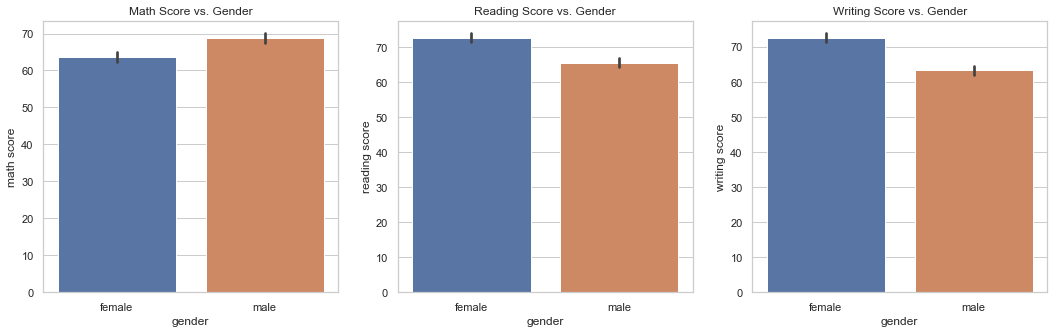

In [43]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(student_df['gender'], student_df['math score'])
plt.title('Math Score vs. Gender');

plt.subplot(1,3,2)
sns.barplot(student_df['gender'], student_df['reading score'])
plt.title('Reading Score vs. Gender');

plt.subplot(1,3,3)
sns.barplot(student_df['gender'], student_df['writing score'])
plt.title('Writing Score vs. Gender');

After plotting the information visually it looks like females outperform male students in reading and writing while males do better in math than females.

In [44]:
round(student_df.groupby('race/ethnicity').mean()[['math score', 'reading score', 'writing score']], 0)

,math score,reading score,writing score
race/ethnicity,,,
group A,62.0,65.0,63.0
group B,63.0,67.0,66.0
group C,64.0,69.0,68.0
group D,67.0,70.0,70.0
group E,74.0,73.0,71.0


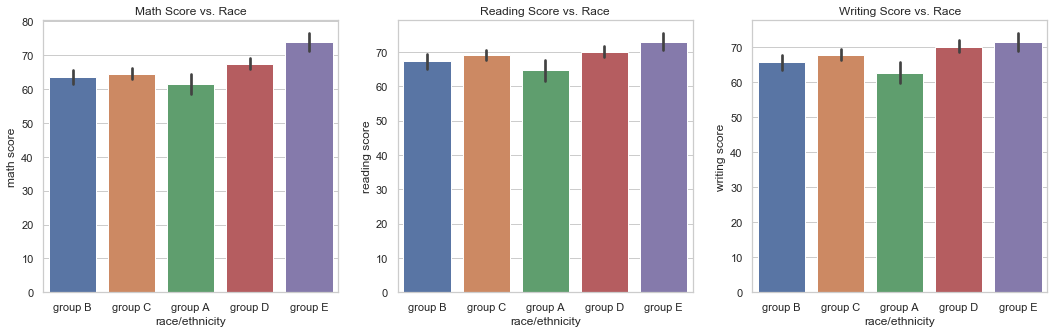

In [45]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(student_df['race/ethnicity'], student_df['math score'])
plt.title('Math Score vs. Race');

plt.subplot(1,3,2)
sns.barplot(student_df['race/ethnicity'], student_df['reading score'])
plt.title('Reading Score vs. Race');

plt.subplot(1,3,3)
sns.barplot(student_df['race/ethnicity'], student_df['writing score'])
plt.title('Writing Score vs. Race');

Visually, it appears that in math group E preformed the highest followed by group D. In reading group E still is the learer with groups D & C close behind. In writing it appears that group E is still slightly in the lead, followed closely by group D and C.

In [46]:
round(student_df.groupby('parental level of education').mean()[['math score', 'reading score', 'writing score']])

,math score,reading score,writing score
parental level of education,,,
associate's degree,68.0,71.0,70.0
bachelor's degree,69.0,73.0,73.0
high school,62.0,65.0,62.0
master's degree,70.0,75.0,76.0
some college,67.0,69.0,69.0
some high school,63.0,67.0,65.0


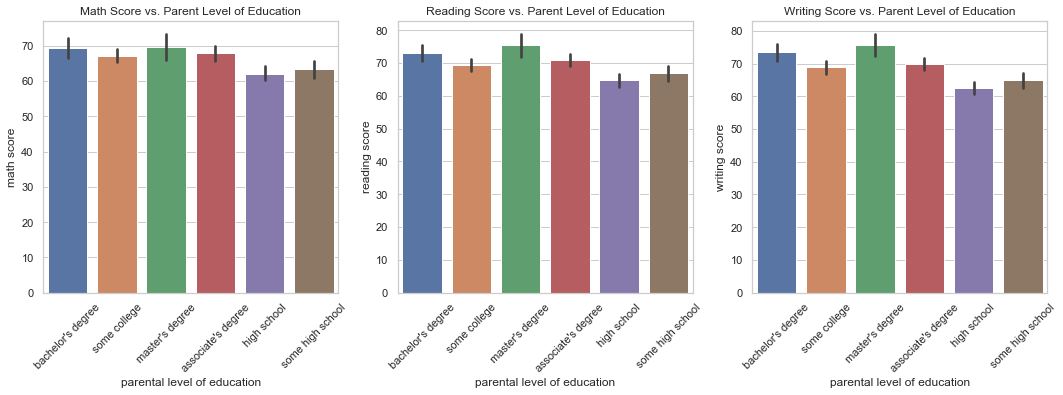

In [47]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(student_df['parental level of education'], student_df['math score'])
plt.title('Math Score vs. Parent Level of Education');
plt.xticks(rotation= 45)

plt.subplot(1,3,2)
sns.barplot(student_df['parental level of education'], student_df['reading score'])
plt.title('Reading Score vs. Parent Level of Education');
plt.xticks(rotation= 45)

plt.subplot(1,3,3)
sns.barplot(student_df['parental level of education'], student_df['writing score'])
plt.title('Writing Score vs. Parent Level of Education');
plt.xticks(rotation= 45);


Question 2: Are there any differences between lunch types with respect to their performance in exams? If yes, how do you explain this?

In [48]:
round(student_df.groupby('lunch').mean()[['math score', 'reading score', 'writing score']])

,math score,reading score,writing score
lunch,,,
free/reduced,59.0,65.0,63.0
standard,70.0,72.0,71.0


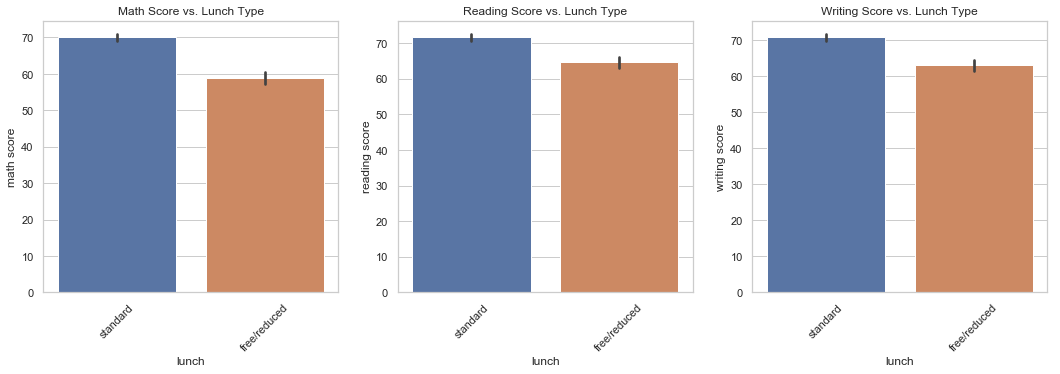

In [49]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(student_df['lunch'], student_df['math score'])
plt.title('Math Score vs. Lunch Type');
plt.xticks(rotation= 45)

plt.subplot(1,3,2)
sns.barplot(student_df['lunch'], student_df['reading score'])
plt.title('Reading Score vs. Lunch Type');
plt.xticks(rotation= 45)

plt.subplot(1,3,3)
sns.barplot(student_df['lunch'], student_df['writing score'])
plt.title('Writing Score vs. Lunch Type');
plt.xticks(rotation= 45);


Overall students who received standard, full price lunch outpreformed their free/reduced lunch peers (the most signifigant difference is in the math scores). One explaination for this trend may be the fact that on testing days students who receive free/reduced lunch lack a sufficent breakfast to help them prepare. Additionally, free/reduced lunch options are not always the most tasty and often students choose to not eat the food. This can cause students to be hungry during testing. Another potential explaination is a deeper story of poverty: if a student is currently receiving aid for food they may not have been exposed to proper nutrition in their formative years, thus causing them to be slightly behind their peers who had adequate nutrition as a child.

Question 3: Does the test preparation course seem to have an effect on the exam performances?

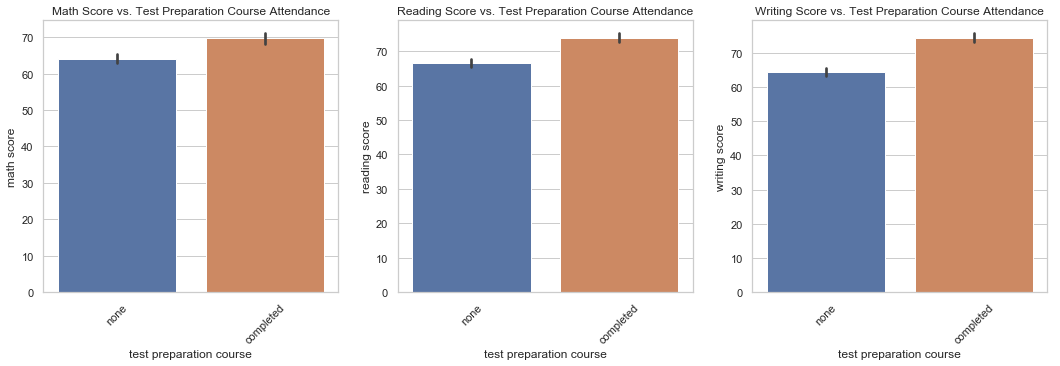

In [50]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(student_df['test preparation course'], student_df['math score'])
plt.title('Math Score vs. Test Preparation Course Attendance');
plt.xticks(rotation= 45)

plt.subplot(1,3,2)
sns.barplot(student_df['test preparation course'], student_df['reading score'])
plt.title('Reading Score vs. Test Preparation Course Attendance');
plt.xticks(rotation= 45)

plt.subplot(1,3,3)
sns.barplot(student_df['test preparation course'], student_df['writing score'])
plt.title('Writing Score vs. Test Preparation Course Attendance');
plt.xticks(rotation= 45);

In [51]:
round(student_df.groupby('test preparation course').mean()[['math score', 'reading score', 'writing score']])

,math score,reading score,writing score
test preparation course,,,
completed,70.0,74.0,74.0
none,64.0,67.0,65.0


Question 4: Which two exam scores are correlated the most with each other?

In [52]:
student_df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


Text(0.5, 1.0, 'Correlation Between Student Preformance')

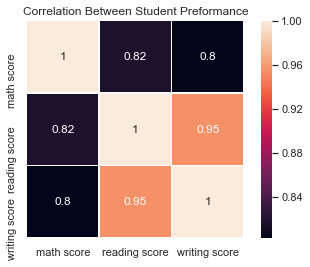

In [53]:
sns.heatmap(student_df.corr(), square= True, annot= True, linewidths = .5)
plt.title('Correlation Between Student Preformance')

## Checkpoint 7: Feature Engineering 1: From Variables to Features

Question 1: Are the exam score variables distributed normally? If not, apply a Box-Cox transformation. Does anything change?

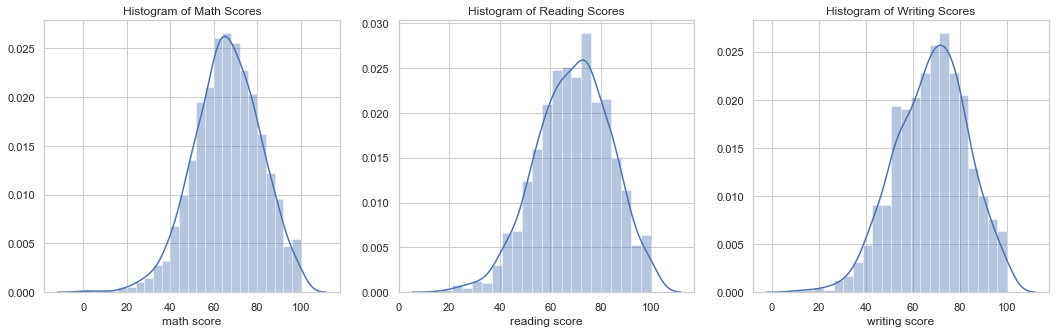

In [54]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.distplot(student_df['math score']);
plt.title('Histogram of Math Scores')

plt.subplot(1,3,2)
sns.distplot(student_df['reading score']);
plt.title('Histogram of Reading Scores')

plt.subplot(1,3,3)
sns.distplot(student_df['writing score'])
plt.title('Histogram of Writing Scores');

Looking at the histograms above it looks like the math scores follow the normal curve & are distributed normally. Reading and writing scores, however, are all over the place and need to have a Box-Cox transformation.

In [55]:
from scipy.stats import boxcox
reading_boxcox = boxcox(student_df['reading score'])
writing_boxcox = boxcox(student_df['writing score'])


In [56]:
pd.Series(reading_boxcox)

0    [252.60869820552682, 342.993742715877, 369.367...
1                                              1.36732
dtype: object

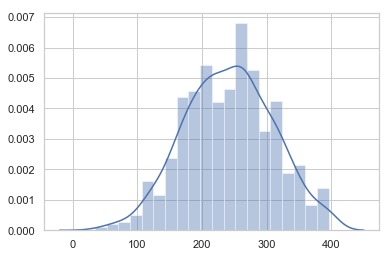

In [57]:
sns.distplot(reading_boxcox[0])

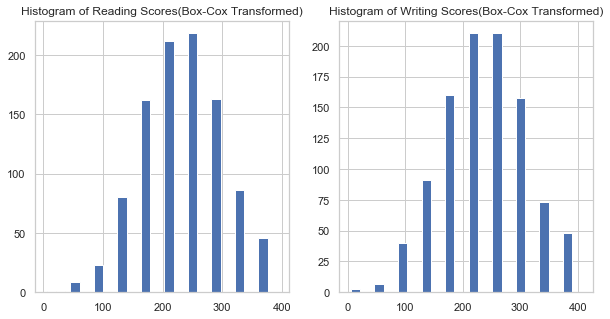

In [58]:
plt.figure(figsize= (10,5))

plt.subplot(1,2,1)
plt.hist(reading_boxcox)
plt.title('Histogram of Reading Scores(Box-Cox Transformed)')

plt.subplot(1,2,2)
plt.hist(writing_boxcox)
plt.title('Histogram of Writing Scores(Box-Cox Transformed)');

Question 2: Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.


In [59]:
exam_scores = (student_df['math score'] + student_df['reading score'] + student_df['writing score'])/3

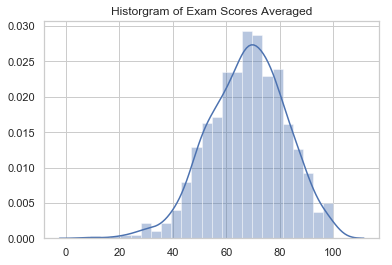

In [60]:
sns.distplot(exam_scores)
plt.title('Historgram of Exam Scores Averaged');

In [61]:
examscore_boxcox = boxcox(exam_scores)

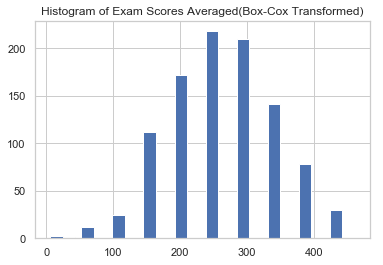

In [62]:
plt.hist(examscore_boxcox)
plt.title('Histogram of Exam Scores Averaged(Box-Cox Transformed)');

Question 3: Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

In [63]:
student_df['exam_score'] = exam_scores

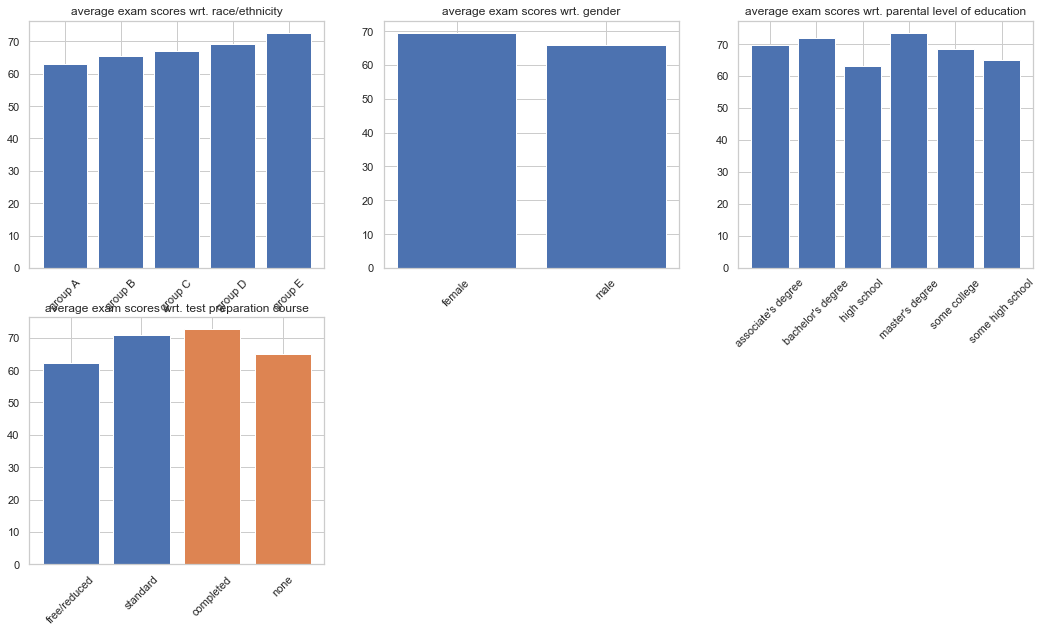

In [64]:
plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
plt.bar(student_df.groupby("race/ethnicity")
        ["exam_score"].mean().index, student_df.groupby("race/ethnicity")["exam_score"].mean())
plt.title("average exam scores wrt. race/ethnicity")
plt.xticks(rotation=45)
        
    
plt.subplot(2, 3, 2)
plt.bar(student_df.groupby("gender")
        ["exam_score"].mean().index, student_df.groupby("gender")["exam_score"].mean())
plt.title("average exam scores wrt. gender")
plt.xticks(rotation=45)

plt.subplot(2,3,3)
plt.bar(student_df.groupby("parental level of education")
        ["exam_score"].mean().index, student_df.groupby("parental level of education")["exam_score"].mean())
plt.title("average exam scores wrt. parental level of education")
plt.xticks(rotation=45)

plt.subplot(2,3,4)
plt.bar(student_df.groupby('lunch')['exam_score'].mean().index, student_df.groupby('lunch')['exam_score'].mean())
plt.title('average exam scores wrt. lunch type')
plt.xticks(rotation = 45)

plt.subplot(2,3,4)
plt.bar(student_df.groupby('test preparation course')['exam_score'].mean().index, student_df.groupby('test preparation course')['exam_score'].mean())
plt.title('average exam scores wrt. test preparation course')
plt.xticks(rotation = 45);

## Checkpoint 8: Feature Engineering 2: Dimensionality and PCA

**Question 1: Create a new score variable from the weighted averages of all score variables in the datasets. Notice that the number of students in the 4th grade isn't the same as the number of students in the 8th grade. So, you should appropriately weigh the scores!.**


In [65]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

states = df['STATE'].unique()

for state in states:
    df.loc[df['STATE']== state, fill_list] = df.loc[df['STATE'] == state, fill_list].interpolate()

In [66]:
df.dropna(inplace = True)

In [67]:
#Borrowed the code from the solution, so I want to make sure I understand what is happening here.
# New overall score is equal to the number of students in the specific grade times the avg. scores of reading and math for the grade divided by 2 plus
# the same procedure for 8th grade.
df['OVERALL_SCORE'] = (df["GRADES_4_G"]*((df["AVG_MATH_4_SCORE"] + df["AVG_READING_4_SCORE"])*0.5) + df["GRADES_8_G"]* ((df["AVG_MATH_8_SCORE"] + df["AVG_READING_8_SCORE"])*0.5))/(df["GRADES_4_G"] + df["GRADES_8_G"])

**Question 2: What are the correlations between this newly created score variable and the expenditure types? Which 1 of the expenditure types is more correlated than the others?**

In [68]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE', 'OVERALL_SCORE'],
      dtype='object')

In [69]:
df[['OVERALL_SCORE', 'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE']].corr()

,OVERALL_SCORE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
OVERALL_SCORE,1.000000,0.074382,0.087626,0.079175,0.011099,-0.004472
TOTAL_EXPENDITURE,0.074382,1.000000,0.990203,0.992861,0.943844,0.924816
INSTRUCTION_EXPENDITURE,0.087626,0.990203,1.000000,0.974425,0.902323,0.883155
SUPPORT_SERVICES_EXPENDITURE,0.079175,0.992861,0.974425,1.000000,0.952062,0.909381
OTHER_EXPENDITURE,0.011099,0.943844,0.902323,0.952062,1.000000,0.917785
CAPITAL_OUTLAY_EXPENDITURE,-0.004472,0.924816,0.883155,0.909381,0.917785,1.000000


The instruction expenditure is the closest value of correlation to 1 when compared to overall score.

**Question 3: Now, apply PCA to the 4 expenditure types. How much of the total variance is explained by the 1st component?**


In [70]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [71]:
X = df[['INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE']]
X = StandardScaler().fit_transform(X)

sklearn_pca = PCA(n_components=1)
df["pca_1"] = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.94252701]


**Question 4: What is the correlation between the overall score variable and the 1st principal component?**


In [72]:
df[['OVERALL_SCORE', 'pca_1', 'INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE']].corr()

,OVERALL_SCORE,pca_1,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
OVERALL_SCORE,1.000000,0.044988,0.087626,0.079175,0.011099,-0.004472
pca_1,0.044988,1.000000,0.968492,0.988085,0.971480,0.955011
INSTRUCTION_EXPENDITURE,0.087626,0.968492,1.000000,0.974425,0.902323,0.883155
SUPPORT_SERVICES_EXPENDITURE,0.079175,0.988085,0.974425,1.000000,0.952062,0.909381
OTHER_EXPENDITURE,0.011099,0.971480,0.902323,0.952062,1.000000,0.917785
CAPITAL_OUTLAY_EXPENDITURE,-0.004472,0.955011,0.883155,0.909381,0.917785,1.000000


**Question 5: If you were to choose the best variables for your model, would you prefer using the 1st principal component instead of the expenditure variables? Why?**

No, I would use the expenditure values (specifically the instruction expenditure & support services expenditure) because they are more closely correlated (0.087 & 0.079, respectively) to the overall score than the 1st principal component is (0.044).

## Checkpoint 9: What Models Do

**Question 1:Try to model the result of a coin toss. In your model, include any features that you think important in explaining the result. Discuss with your mentor about the pros and cons of adding too many features into your model.**


For this model we need to start with the basic information about the experiment. Some features that are important are:
1. Weight and mass of coin
2. Amount of force used to flip the coin
3. Who flipped the coin
4. Condition of the hand of the person who is flipping the coin
5. Distance from contact surface and hand when dropping
6. Time it takes for coin to fall
7. Wind and weather condition in area coin is tossed in

And so much more. There is a wealth of micro-information we can add to the features of this project. I have the feeling if we don´t limit ourselves to a specific set of features at the beginning of a project the entire situation could become a crazy mess!

**Question 2: If you ever used Netflix, you should already have realized that it provides some recommendations for you to watch. In data science, this is an example of the so-called recommendations systems. Read this nontechnical blog post of Netflix about how they model their recommendations systems. Then, derive the features they use in their recommendations engines and discuss what else can be incorporated into this model.**

After reading the article several key features used in the Netflix recommendation system are:
* Watching history/ratings of past viewings/interactions with the website
* History/actions of members with similar tastes
* Information about the titles you watch (such as who the actors are, who the director is, type of genre, etc...)
* The time of day you typically view content
* Devices used to access content
* The length of time you watch content
* Country currently residing in/watching from
* Local preferences/trending (not explicitly mentioned in the article but something I have experienced first hand)

One thing I found interesting was that Netflix outright said that they do not use demographic information to predict viewing options. I have to wonder if there is a rule/law against using this type of data. If not, it might be a great way to include additional options, but should not be used as an important identifier. In addition to demographic data being an additional feature that could be used some other data that might help recommend content are: marital status (demographic, yes, I know), user-inputed preferences (like genre, length of movies, preferences for tone of movies- I hate movies with a twist depressing ending), and many others. 

## Checkpoint 10:  Challenge: Factors That Affect Life Expectancy

**Tasks for this challenge:**
Identify factors that affect life expectancy across the world by country
1. Clean data (deal with missing values and outliers)
2. Explore the data
3. Engineer features to better help understand our target variable
4. Summarize the findings

In [74]:
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))


lifeexp_df = pd.read_sql_query('select * from lifeexpectancy',con=engine)

engine.dispose()

In [76]:
lifeexp_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [92]:
# Checking column names to see if they need to be manipulated to make easier to deal with
lifeexp_df.columns

Index(['country', 'year', 'status', 'life_expectancy_', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles_', '_bmi_', 'under-five_deaths_', 'polio', 'total_expenditure',
       'diphtheria_', '_hiv/aids', 'gdp', 'population',
       '_thinness__1-19_years', '_thinness_5-9_years',
       'income_composition_of_resources', 'schooling'],
      dtype='object')

In [85]:
#Change all column titles to lowercase and switch snake case for spaces.
new_cols = [name.lower().replace(' ', "_") for name in list(lifeexp_df.columns)]

In [83]:
repl_cols_dict = dict(zip(list(lifeexp_df.columns), new_cols))
lifeexp_df.rename(columns = repl_cols_dict, inplace= True)
lifeexp_df.head(3)

,country,year,status,life_expectancy_,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles_,...,polio,total_expenditure,diphtheria_,_hiv/aids,gdp,population,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9


In [89]:
# What information are we missing from our df?
lifeexp_df.isnull().sum().sort_values(ascending = False)


population                         652
hepatitis_b                        553
gdp                                448
total_expenditure                  226
alcohol                            194
income_composition_of_resources    167
schooling                          163
_bmi_                               34
_thinness__1-19_years               34
_thinness_5-9_years                 34
diphtheria_                         19
polio                               19
adult_mortality                     10
life_expectancy_                    10
under-five_deaths_                   0
_hiv/aids                            0
measles_                             0
percentage_expenditure               0
infant_deaths                        0
status                               0
year                                 0
country                              0
dtype: int64

In [91]:
#Specific look at missing values in life_expectancy & adult_mortality
lifeexp_df.loc[lifeexp_df['life_expectancy_'].isnull(), :]

,country,year,status,life_expectancy_,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles_,...,polio,total_expenditure,diphtheria_,_hiv/aids,gdp,population,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,schooling
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,...,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
769,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,...,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1651,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,...,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1716,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1813,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,...,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
1910,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
1959,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2168,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,...,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2217,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2713,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,...,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0


In [96]:
lifeexp_df.dtypes

country                             object
year                                 int64
status                              object
life_expectancy_                   float64
adult_mortality                    float64
infant_deaths                        int64
alcohol                            float64
percentage_expenditure             float64
hepatitis_b                        float64
measles_                             int64
_bmi_                              float64
under-five_deaths_                   int64
polio                              float64
total_expenditure                  float64
diphtheria_                        float64
_hiv/aids                          float64
gdp                                float64
population                         float64
_thinness__1-19_years              float64
_thinness_5-9_years                float64
income_composition_of_resources    float64
schooling                          float64
dtype: object

In [105]:
df_1= lifeexp_df.copy()
# For columns in the fill_list look at df4 where they match and interpolate the values
fill_list = ['year',  'life_expectancy_', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles_', '_bmi_', 'under-five_deaths_', 'polio', 'total_expenditure',
       'diphtheria_', '_hiv/aids', 'gdp', 'population',
       '_thinness__1-19_years', '_thinness_5-9_years',
       'income_composition_of_resources', 'schooling']


for col in fill_list:
   df_1.loc[:, col].interpolate(inplace=True)
df_1.head()

,country,year,status,life_expectancy_,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles_,...,polio,total_expenditure,diphtheria_,_hiv/aids,gdp,population,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [107]:
#Sanity check to make sure all null values are taken care of!
df_1.isnull().sum()

country                            0
year                               0
status                             0
life_expectancy_                   0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles_                           0
_bmi_                              0
under-five_deaths_                 0
polio                              0
total_expenditure                  0
diphtheria_                        0
_hiv/aids                          0
gdp                                0
population                         0
_thinness__1-19_years              0
_thinness_5-9_years                0
income_composition_of_resources    0
schooling                          0
dtype: int64

In [126]:
df_1.describe()

,year,life_expectancy_,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles_,_bmi_,under-five_deaths_,polio,total_expenditure,diphtheria_,_hiv/aids,gdp,population,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.00000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.214874,164.744554,30.303948,4.548919,738.251295,78.536419,2419.592240,38.29869,42.035739,82.474643,5.940955,82.246086,1.742103,7432.027910,1.229209e+07,4.882301,4.920439,0.634458,12.076804
std,4.613841,9.510819,124.226596,117.926501,3.994854,1987.914858,25.177963,11467.272489,19.99140,160.445548,23.420689,2.445751,23.705664,5.077785,13410.150286,5.471908e+07,4.433359,4.532488,0.209574,3.342316
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.00000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.902500,4.685343,71.000000,0.000000,19.32500,0.000000,78.000000,4.312500,78.000000,0.100000,553.618620,2.536025e+05,1.600000,1.600000,0.500000,10.200000
50%,2008.000000,72.000000,144.000000,3.000000,3.697500,64.912906,89.000000,17.000000,43.25000,4.000000,93.000000,5.760000,93.000000,0.100000,2192.681084,1.576319e+06,3.400000,3.400000,0.684000,12.400000
75%,2012.000000,75.600000,228.000000,22.000000,7.550000,441.534144,96.000000,360.250000,56.10000,28.000000,97.000000,7.440000,97.000000,0.800000,7183.381694,8.215738e+06,7.200000,7.300000,0.791107,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.30000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


After looking at the standard deviations there are several features that standout as potentially having a huge outlier. Let's visualize the data below.

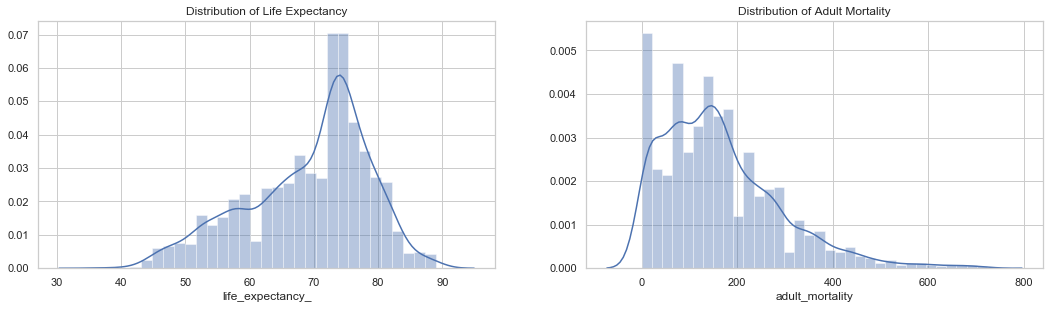

In [117]:
plt.figure(figsize= (18,10))
plt.subplot(2,2,1)
sns.distplot(df_1['life_expectancy_']);
plt.title('Distribution of Life Expectancy')


plt.subplot(2,2,2)
sns.distplot(df_1['adult_mortality'])
plt.title('Distribution of Adult Mortality');

In [140]:
df_1.loc[df_1['life_expectancy_'].max()]

country                              Argentina
year                                      2007
status                              Developing
life_expectancy_                          74.8
adult_mortality                            129
infant_deaths                               10
alcohol                                   8.16
percentage_expenditure                 1105.66
hepatitis_b                                 85
measles_                                     0
_bmi_                                       58
under-five_deaths_                          12
polio                                       92
total_expenditure                         6.49
diphtheria_                                 91
_hiv/aids                                  0.1
gdp                                    7193.62
population                         3.99722e+06
_thinness__1-19_years                      1.1
_thinness_5-9_years                        0.9
income_composition_of_resources          0.788
schooling    

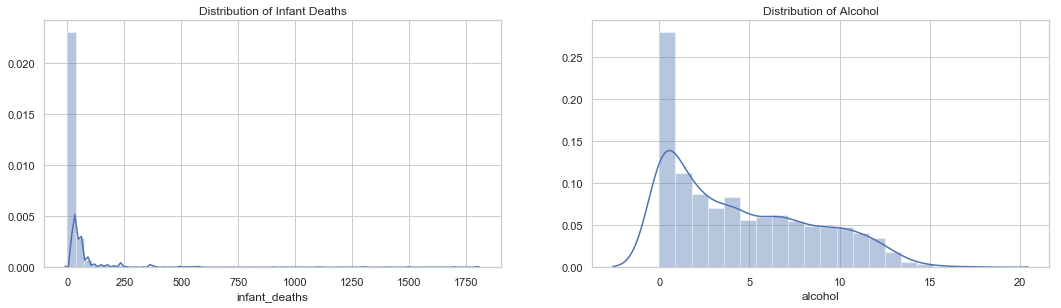

In [118]:
plt.figure(figsize= (18,10))
plt.subplot(2,2,1)
sns.distplot(df_1['infant_deaths']);
plt.title('Distribution of Infant Deaths')


plt.subplot(2,2,2)
sns.distplot(df_1['alcohol'])
plt.title('Distribution of Alcohol');

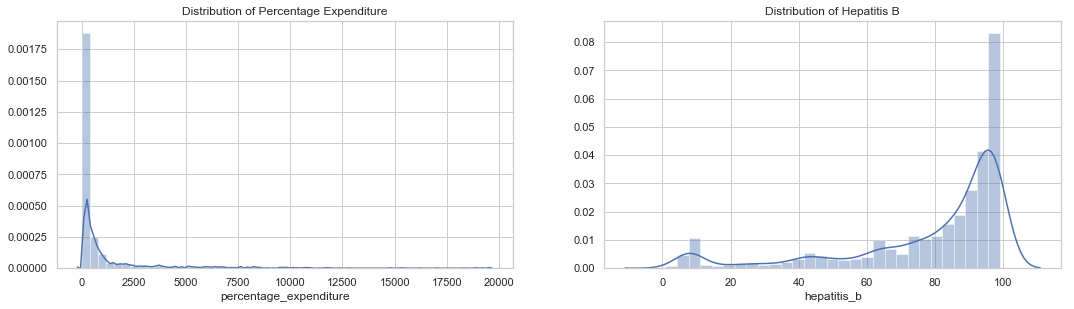

In [119]:
plt.figure(figsize= (18,10))
plt.subplot(2,2,1)
sns.distplot(df_1['percentage_expenditure']);
plt.title('Distribution of Percentage Expenditure')


plt.subplot(2,2,2)
sns.distplot(df_1['hepatitis_b'])
plt.title('Distribution of Hepatitis B');

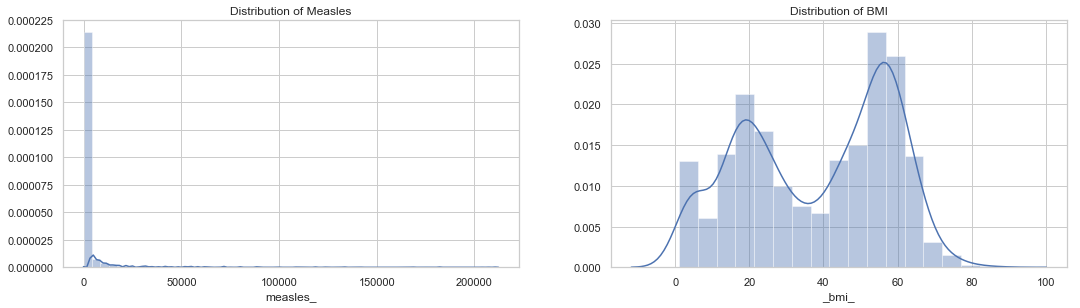

In [120]:
plt.figure(figsize= (18,10))
plt.subplot(2,2,1)
sns.distplot(df_1['measles_']);
plt.title('Distribution of Measles')


plt.subplot(2,2,2)
sns.distplot(df_1['_bmi_'])
plt.title('Distribution of BMI');

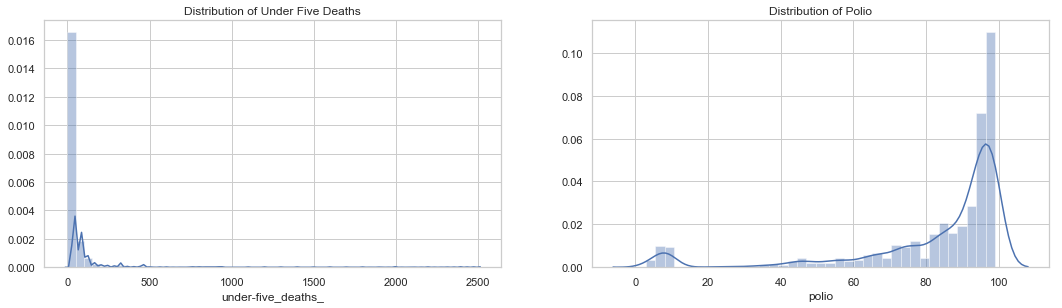

In [121]:
plt.figure(figsize= (18,10))
plt.subplot(2,2,1)
sns.distplot(df_1['under-five_deaths_']);
plt.title('Distribution of Under Five Deaths')


plt.subplot(2,2,2)
sns.distplot(df_1['polio'])
plt.title('Distribution of Polio');

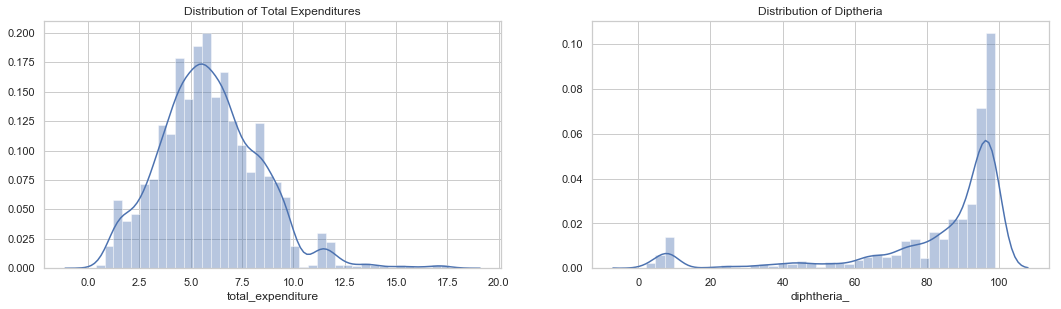

In [122]:
plt.figure(figsize= (18,10))
plt.subplot(2,2,1)
sns.distplot(df_1['total_expenditure']);
plt.title('Distribution of Total Expenditures')


plt.subplot(2,2,2)
sns.distplot(df_1['diphtheria_'])
plt.title('Distribution of Diptheria');

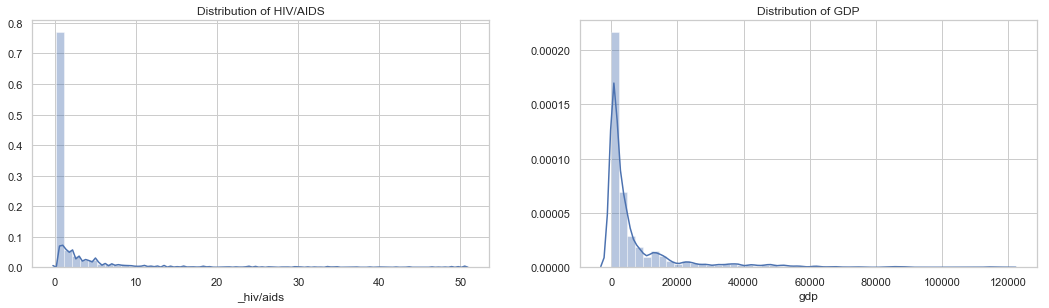

In [123]:
plt.figure(figsize= (18,10))
plt.subplot(2,2,1)
sns.distplot(df_1['_hiv/aids']);
plt.title('Distribution of HIV/AIDS')


plt.subplot(2,2,2)
sns.distplot(df_1['gdp'])
plt.title('Distribution of GDP');

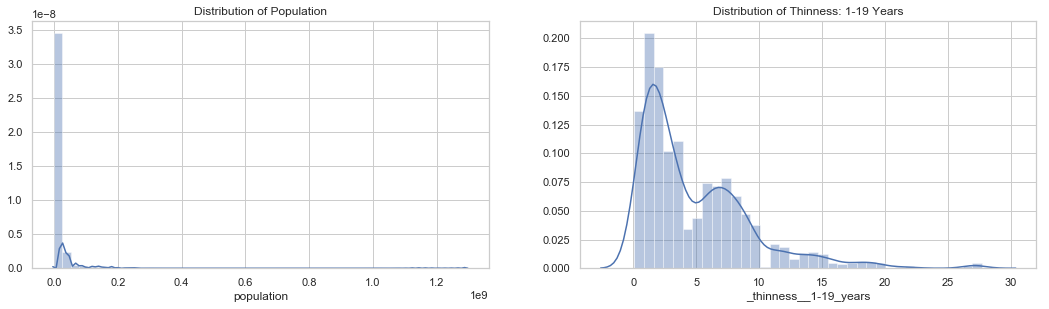

In [124]:
plt.figure(figsize= (18,10))
plt.subplot(2,2,1)
sns.distplot(df_1['population']);
plt.title('Distribution of Population')


plt.subplot(2,2,2)
sns.distplot(df_1['_thinness__1-19_years'])
plt.title('Distribution of Thinness: 1-19 Years');

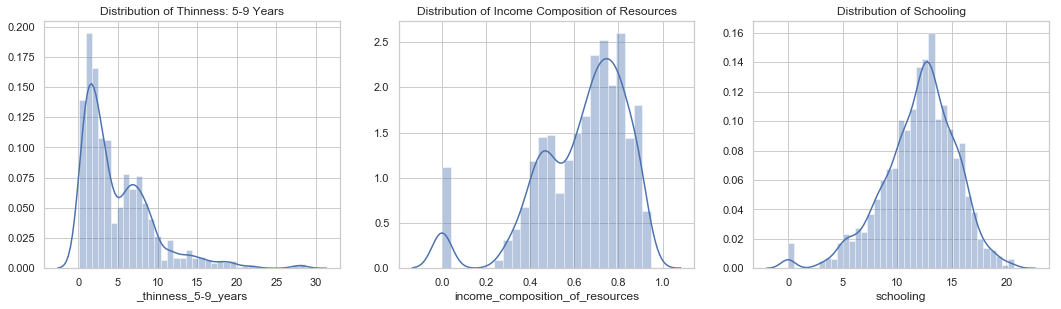

In [125]:
plt.figure(figsize= (18,10))
plt.subplot(2,3,1)
sns.distplot(df_1['_thinness_5-9_years']);
plt.title('Distribution of Thinness: 5-9 Years')


plt.subplot(2,3,2)
sns.distplot(df_1['income_composition_of_resources'])
plt.title('Distribution of Income Composition of Resources');

plt.subplot(2,3,3)
sns.distplot(df_1['schooling'])
plt.title('Distribution of Schooling');

NOTE: This will be updated once I figure out what the best way to deal with my outliers for each feature is!